# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора


Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


##########
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.datasets import load_digits
MNIST_dataset = load_digits()

In [3]:
type(MNIST_dataset), print(MNIST_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


(sklearn.utils.Bunch, None)

In [4]:
print(MNIST_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
MNIST_dataset["images"].shape, MNIST_dataset["target"].shape

((1797, 8, 8), (1797,))

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



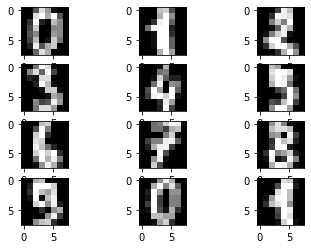

In [7]:
plot_images = MNIST_dataset["images"][0:12]
fig, ax = plt.subplots(4,3)
i = 0
r,c=0,0
for img in plot_images:
    if((i%3==0) and (i!=0)):
        r+=1
        c=0
    ax[r,c].imshow(img)
    c+=1
    i+=1
    

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [8]:
MNIST_dataset["data"].shape, MNIST_dataset["images"].shape

((1797, 64), (1797, 8, 8))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MNIST_dataset["data"],MNIST_dataset["target"], test_size = 0.3, random_state = 22)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [10]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [11]:
## перезагрузка подруждаемых модулей
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1.5 Выполните классификацию на тестовой выборке

In [12]:
y_pred_num_loop_0 = classifier.predict(X = X_test, k = 5, num_loops = 0)
y_pred_num_loop_1 = classifier.predict(X = X_test, k = 5, num_loops = 1)
y_pred_num_loop_2 = classifier.predict(X = X_test, k = 5, num_loops = 2)

In [13]:
y_pred_num_loop_0

array([4., 5., 3., 1., 1., 8., 8., 8., 4., 3., 3., 8., 9., 1., 4., 0., 0.,
       9., 0., 2., 2., 3., 2., 7., 9., 3., 2., 8., 6., 5., 1., 3., 0., 3.,
       9., 2., 6., 1., 8., 1., 2., 5., 1., 7., 8., 3., 4., 7., 7., 4., 2.,
       7., 8., 0., 2., 8., 7., 0., 0., 1., 9., 4., 4., 1., 1., 6., 8., 1.,
       1., 6., 3., 3., 0., 5., 1., 7., 8., 5., 9., 2., 0., 6., 7., 0., 3.,
       8., 9., 9., 7., 6., 1., 5., 6., 6., 9., 3., 7., 2., 3., 8., 8., 4.,
       1., 3., 9., 7., 5., 3., 6., 4., 4., 3., 1., 3., 6., 2., 4., 0., 4.,
       2., 9., 1., 7., 1., 8., 9., 8., 3., 3., 4., 1., 3., 0., 2., 3., 2.,
       0., 8., 6., 5., 9., 3., 6., 8., 9., 7., 9., 7., 1., 5., 4., 7., 4.,
       3., 7., 4., 0., 7., 9., 5., 4., 6., 3., 6., 6., 1., 8., 1., 0., 1.,
       0., 2., 8., 1., 4., 2., 6., 3., 5., 8., 5., 0., 1., 0., 0., 0., 1.,
       9., 5., 0., 0., 1., 2., 6., 1., 3., 6., 6., 5., 4., 3., 1., 4., 5.,
       8., 6., 6., 7., 7., 1., 7., 4., 3., 5., 2., 1., 9., 2., 9., 6., 6.,
       0., 2., 0., 2., 2.

In [14]:
y_pred_num_loop_1

array([4., 5., 3., 1., 1., 8., 8., 8., 4., 3., 3., 8., 9., 1., 4., 0., 0.,
       9., 0., 2., 2., 3., 2., 7., 9., 3., 2., 8., 6., 5., 1., 3., 0., 3.,
       9., 2., 6., 1., 8., 1., 2., 5., 1., 7., 8., 3., 4., 7., 7., 4., 2.,
       7., 8., 0., 2., 8., 7., 0., 0., 1., 9., 4., 4., 1., 1., 6., 8., 1.,
       1., 6., 3., 3., 0., 5., 1., 7., 8., 5., 9., 2., 0., 6., 7., 0., 3.,
       8., 9., 9., 7., 6., 1., 5., 6., 6., 9., 3., 7., 2., 3., 8., 8., 4.,
       1., 3., 9., 7., 5., 3., 6., 4., 4., 3., 1., 3., 6., 2., 4., 0., 4.,
       2., 9., 1., 7., 1., 8., 9., 8., 3., 3., 4., 1., 3., 0., 2., 3., 2.,
       0., 8., 6., 5., 9., 3., 6., 8., 9., 7., 9., 7., 1., 5., 4., 7., 4.,
       3., 7., 4., 0., 7., 9., 5., 4., 6., 3., 6., 6., 1., 8., 1., 0., 1.,
       0., 2., 8., 1., 4., 2., 6., 3., 5., 8., 5., 0., 1., 0., 0., 0., 1.,
       9., 5., 0., 0., 1., 2., 6., 1., 3., 6., 6., 5., 4., 3., 1., 4., 5.,
       8., 6., 6., 7., 7., 1., 7., 4., 3., 5., 2., 1., 9., 2., 9., 6., 6.,
       0., 2., 0., 2., 2.

In [15]:
y_pred_num_loop_2

array([4., 5., 3., 1., 1., 8., 8., 8., 4., 3., 3., 8., 9., 1., 4., 0., 0.,
       9., 0., 2., 2., 3., 2., 7., 9., 3., 2., 8., 6., 5., 1., 3., 0., 3.,
       9., 2., 6., 1., 8., 1., 2., 5., 1., 7., 8., 3., 4., 7., 7., 4., 2.,
       7., 8., 0., 2., 8., 7., 0., 0., 1., 9., 4., 4., 1., 1., 6., 8., 1.,
       1., 6., 3., 3., 0., 5., 1., 7., 8., 5., 9., 2., 0., 6., 7., 0., 3.,
       8., 9., 9., 7., 6., 1., 5., 6., 6., 9., 3., 7., 2., 3., 8., 8., 4.,
       1., 3., 9., 7., 5., 3., 6., 4., 4., 3., 1., 3., 6., 2., 4., 0., 4.,
       2., 9., 1., 7., 1., 8., 9., 8., 3., 3., 4., 1., 3., 0., 2., 3., 2.,
       0., 8., 6., 5., 9., 3., 6., 8., 9., 7., 9., 7., 1., 5., 4., 7., 4.,
       3., 7., 4., 0., 7., 9., 5., 4., 6., 3., 6., 6., 1., 8., 1., 0., 1.,
       0., 2., 8., 1., 4., 2., 6., 3., 5., 8., 5., 0., 1., 0., 0., 0., 1.,
       9., 5., 0., 0., 1., 2., 6., 1., 3., 6., 6., 5., 4., 3., 1., 4., 5.,
       8., 6., 6., 7., 7., 1., 7., 4., 3., 5., 2., 1., 9., 2., 9., 6., 6.,
       0., 2., 0., 2., 2.

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


<AxesSubplot:>

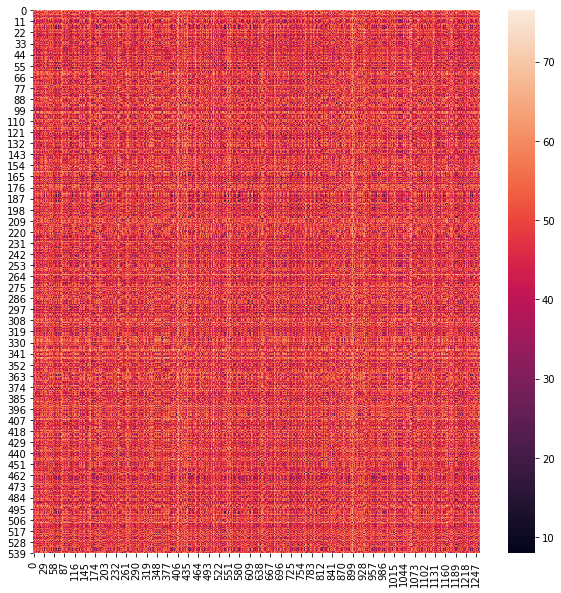

In [16]:
import seaborn as seab
plt.figure(figsize =(10,10))
seab.heatmap(classifier.dists)

**Inline Question 1** 

Обратите внимание на структурированные шаблоны в матрице расстояний, где некоторые строки или столбцы видны ярче. (Обратите внимание, что в цветовой схеме по умолчанию черный цвет указывает на малые расстояния, а белый — на большие.)

- Что в данных является причиной ярко выраженных строк?
- Что вызывает столбцы?

$\color{blue}{\textit Your Answer:}$ Примем во внимание что данные не были предварительно центрированы. По вертикальной оси расположены номера тестовых изображений по горизонтали тренировочных. Причиной ярко выраженных строк (что означает относительно большие значения метрики расстояния к остальным изображениями) является то, что эти изображения из тестового набора могут сильно отличаться (перевернутые, полностью темные/белые и т. п.) от общей массы тренировочных изображений и быть так называемыми выбросами. Что касается ярко выраженных столбцов то эти изображения из тренировочного набора являются выбросами по отношению к тестовым изображениям.


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [17]:
accuracy = np.mean(y_pred_num_loop_2 == y_test)
print("Accuracy {}".format(accuracy))

Accuracy 0.9851851851851852


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

- совместим 1.8 и 1.9

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [19]:
# Валидацию произведем по 5 блоткам (1 валидационный и 4 для обучения)
num_blocks = 5 
x_train_blocks = np.asarray(np.array_split(X_train, num_blocks))
y_train_blocks = np.asarray(np.array_split(y_train, num_blocks))
print("размеры блоков для кроссвалидации : \n {0} \n {1} ".format([block.shape for block in x_train_blocks], [block.shape for block in y_train_blocks]))


размеры блоков для кроссвалидации : 
 [(252, 64), (252, 64), (251, 64), (251, 64), (251, 64)] 
 [(252,), (252,), (251,), (251,), (251,)] 


In [20]:
### кросс валидация. Гиперпараметр - кол-во соседей  
accuracy_array=[]
k_values = np.arange(1,31,2)


for k in k_values:
    accuracy_validation_array = []
    for cross_iteration in range(5):
        
        validation_set_x = x_train_blocks[cross_iteration]
        validation_set_y =  y_train_blocks[cross_iteration]
        
        train_set_x = np.concatenate(x_train_blocks[np.delete(np.arange(0,num_blocks,1),cross_iteration)])
        train_set_y = np.concatenate(y_train_blocks[np.delete(np.arange(0,num_blocks,1),cross_iteration)])
        
        classifier = KNearestNeighbor()
        classifier.train(train_set_x, train_set_y)
        
        predict = classifier.predict(validation_set_x, k = k, num_loops = 0)
        accuracy_validation_array.append(np.mean(predict == validation_set_y))
        
    accuracy_array.append(accuracy_validation_array)
    
    

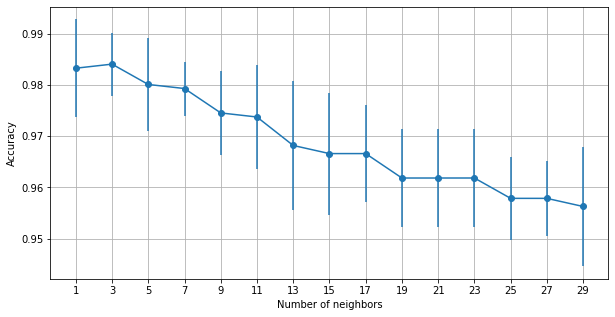

In [21]:
accuracy_means = np.mean(accuracy_array, axis = 1)
accuracy_std = np.std(accuracy_array, axis = 1)
fig, ax= plt.subplots(figsize = (10,5))
ax.errorbar(k_values, accuracy_means, yerr=accuracy_std, fmt='-o')
plt.xticks(k_values)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(True)



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [22]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
predict = classifier.predict(X_test, k = 3, num_loops = 0)
print("Accuracy {}".format(np.mean(y_test == predict)))

Accuracy 0.9888888888888889


**Inline Question 2**

Мы также можем использовать другие метрики расстояния, такие как расстояние L1.
Для значений пикселей $p_{ij}^{(k)}$ в позиции $(i,j)$ некоторого изображения $I_k$,

среднее значение $\mu$ по всем пикселям по всем изображениям равно $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j =1}^{w}p_{ij}^{(k)}$$
А среднее значение $\mu_{ij}$ по всем изображениям в пикселях равно
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
Общее стандартное отклонение $\sigma$ и попиксельное стандартное отклонение $\sigma_{ij}$ определяются аналогично.

Какой из следующих шагов предварительной обработки не изменит производительность классификатора ближайших соседей, использующего расстояние L1? Выбрать все, что подходит.
1. Вычитание среднего значения $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Вычитание среднего пикселя $\mu_{ij}$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$. )
3. Вычитание среднего $\mu$ и деление на стандартное отклонение $\sigma$.
4. Вычитание среднего по пикселям $\mu_{ij}$ и деление на стандартное отклонение по пикселям $\sigma_{ij}$.
5. Вращение координатных осей данных.

$\color{blue}{\textit Your Answer: 2,3,5}$


$\color{blue}{\textit Your Explanation:}$ 5 - метрика расстояния L1 не зависит от изменения порядка суммирования (вращения осей данных) и по сути никакого влияние на результат классификации kNN не влияет , 2 -  среднее значения  пикселя по всем пикселям всех изображений подвержен большому влиянию шума в данных и не содержит сам по себе важной информации, аналогичен вариант 3. В отличие от вычитания среднних пикселей (вариант 1, и подобный ему 4) из пикселей в соответствующих им координатах во всех изображениях, что позволит уменьшить вносимый фоном шум и увеличить влияние взаимного расположения пикселей и их значений на метрику расстояния.

**Inline Question 3**

Какие из следующих утверждений о $k$-ближайшем соседе ($k$-NN) верны в условиях классификации и для всех $k$? Выбрать все, что подходит.
1. Граница решения классификатора k-NN является линейной.
2. Ошибка обучения 1-NN всегда будет меньше или равна ошибке 5-NN.
3. Ошибка теста 1-NN всегда будет ниже, чем у 5-NN.
4. Время, необходимое для классификации тестового примера с помощью классификатора k-NN, растет с увеличением размера обучающей выборки.
5. Ничего из перечисленного.

$\color{blue}{\textit Your Answer:}$ 2, 4


$\color{blue}{\textit Your Explanation:}$ 
    
    2 : 1-NN представляет собой классификацию изображений на основе информации класса от 1-го ближайшего соседа в обучающей выборке. Это значит что ошибка такого классификатора на данных для обучения будет = 0, так как в результате произойдет вычисление метрики расстояния для двух одинаковых изображений и она будет минимальной. 

    4 : для классификации методом k-NN необходимо вычислить метрику расстояния от входного изображения ко всем изображениями в обучающей выборке. Чем больше обучающая выборка тем больше раз нужно вычислить метрику.


1.11 Сделайте выводы по результатам 1 части задания.

- В первой части задания предлагалось реализовать классификатор K ближайших соседей (knn) для классификации изображений MNIST.
- В качестве метрики расстояния между изображениями использовалась норма L2 суммы разностей пикселов двух изображений.
- Были реализованы 3 варианта вычисления нормы L2: 1) в 2 цикла, 2)  в 1 цикл, 3) без циклов.
- Реализована кросс-валидация для выбора такого гиперпараметра классификатора knn как количество соседей по такой метрике качества как:  доля верных ответов (accuracy).
Данные были разделены на 5 блоков.
- При увеличении количества соседов доля верных ответов классификатора уменьшалась в результате увеличения вносимого соседями шума.
- В результате проведения кросс-валидации наибольший показатель accuracy = 0.9(8) был достигнут на тестовой выборке при количестве соседей k = 3.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [23]:
'''x_train, x_test, y_train, y_test = train_test_split(MNIST_dataset["data"],MNIST_dataset["target"], test_size = 0.3, random_state = 22)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)'''

X,Y = MNIST_dataset.data, MNIST_dataset.target
x_train, x_test, y_train, y_test = train_test_split (X,Y, test_size = 0.35, random_state = 22)
x_val = np.copy(x_test[0:len(x_test)//2]) # 17% от всего
y_val = np.copy(y_test[0:len(x_test)//2])

x_test = x_test[len(x_val)::]
y_test = y_test[len(y_val)::]

print(x_train.shape, x_val.shape, x_test.shape)

(1168, 64) (314, 64) (315, 64)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[0.00000000e+00 3.07363014e-01 5.29880137e+00 1.20034247e+01
 1.18493151e+01 5.79195205e+00 1.32277397e+00 1.23287671e-01
 5.99315068e-03 2.05393836e+00] (64,)


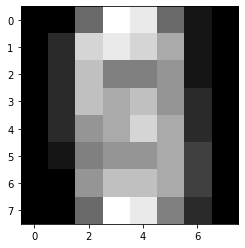

In [24]:
mean_image = np.mean(x_train, axis = 0)
print(mean_image[:10],mean_image.shape ) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8,8)).astype('uint8')) 
plt.show()
x_train -= mean_image
x_test -= mean_image
x_val -=mean_image

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [25]:
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
x_val = np.hstack( (x_val, np.ones((x_val.shape[0], 1))) )

print(x_train.shape, x_test.shape, x_val.shape)

(1168, 65) (315, 65) (314, 65)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



### Параллельно вычисля loss-функцию можно высчитать градиент.
Вычислим аналитически градиент функции потерь для multiclass svm

$L = 1/N \sum_{i=1}^{N} L_{i} + \lambda R(W)$, где $R(W)$ - регуляризация. используется L2 норма: $\sum_{k}\sum_{l}w_{k,l}^2$

$L_{i}=\sum_{j≠y_{i}} max(0,s_{j}−s_{y_{i}}+\Delta)$, $\Delta = 1$, $s_{j}, s_{y_{i}}$ - оценки классификатора для не целегого класса, и целегого соответственно

$L_{i}=\sum_{j≠y_{i}} max(0,w^{T}_{j}x_{i}−w^T_{y_{i}}x_{i}+1)$, где $w^{T}_{j}x_{i}, w^T_{y_{i}}x_{i}$ - скалярные произведения. $w^{T}_{j}$ - $j$-ая строка матрицы $w$ транспонированная в столбец; $x_{i}$ − вектор столбец входного экземпляра данных (массив пикселей)

Подсчитаем аналитически градиент.
Сначала для $L_{i}$ : $\frac{dL_{i}}{dw}$, так как имеем $w_{y{i}}$ и $w_{j}$, то вычислим  $\frac{dL_{i}}{dw_{y{i}}}$, $\frac{dL_{i}}{dw_{j}}$


$\frac{dL_{i}}{dw_{y{i}}} = $ $(-x_{i})\sum_{j \neq y_i} [1, если \ ( w^{T}_{j}x_{i}−w^T_{y_{i}}x_{i}+1  > 0), иначе \ 0 \ т.к \ \frac{0}{dw_{y{i}}} = 0]$

$\frac{dL_{i}}{dw_{j}} = x_{i} [1, если \ ( w^{T}_{j}x_{i}−w^T_{y_{i}}x_{i}+1  > 0) ]$  
 
$\frac{\lambda R(W)}{dW} = \frac{\lambda\sum_{k}\sum_{l}w_{k,l}^2}{dw} =2 \lambda W$



In [26]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(65, 10) * 0.0001 

loss, grad = svm_loss_naive(W, x_train, y_train, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.001033



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [28]:

loss, grad = svm_loss_naive(W, x_train, y_train, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, x_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, x_train, y_train, 5e1)
f = lambda w: svm_loss_naive(w, x_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -6.402981 analytic: -6.402981, relative error: 7.495642e-11
numerical: 3.049323 analytic: 3.049323, relative error: 1.104194e-10
numerical: -0.012982 analytic: -0.012982, relative error: 5.101495e-08
numerical: 1.976919 analytic: 1.976919, relative error: 3.371856e-10
numerical: 2.835509 analytic: 2.835509, relative error: 2.132588e-10
numerical: 0.844143 analytic: 0.844143, relative error: 5.749250e-10
numerical: 2.033500 analytic: 2.033500, relative error: 3.964612e-10
numerical: -3.094565 analytic: -3.094565, relative error: 1.369553e-10
numerical: -4.399226 analytic: -4.399226, relative error: 1.303212e-10
numerical: 0.000865 analytic: 0.000865, relative error: 7.952578e-07
numerical: 0.062113 analytic: 0.062113, relative error: 1.668558e-09
numerical: -4.734405 analytic: -4.734405, relative error: 2.376603e-11
numerical: -1.914227 analytic: -1.914227, relative error: 9.672017e-11
numerical: -2.522130 analytic: -2.522130, relative error: 1.391035e-10
numerical: -0.214626

**Inline Question 1**

Возможно, что время от времени размер в gradcheck не будет точно совпадать. Чем может быть вызвано такое несоответствие? Это повод для беспокойства? Какой простой пример в одном измерении может привести к ошибке проверки градиента? Как изменится маржинальный эффект частоты этого события? *Подсказка: функция потерь SVM, строго говоря, не дифференцируема*

$\color{blue}{\textit Your Answer:}$ *Не соответствие на порядок и больше значений градиентов вычисленных числено и аналитически является следствием вычисления градиента численно около точки перегиба кусочной функции. В нашем примере такой кусочной не дифференцируемой функцией является max(0,x). Например, вычисляя градиент (max(0,x+h)-max(0,x))/h где x < 0 (x = -1e-5), где h такой что x+h > 0 (h = 1e-4). При этом аналитический градиент = 0, а численный > 0. С увеличением приращения h может увеличиться частота таких переходов через точку перегиба. Решение этой проблемы может быть использование субградиента.*

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [34]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, x_train, y_train, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

from scripts.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, x_train, y_train, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.142955s
Vectorized loss and gradient: computed in 0.000652s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [35]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(x_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 26.712526
iteration 100 / 1500: loss 15.478266
iteration 200 / 1500: loss 11.352103
iteration 300 / 1500: loss 9.822679
iteration 400 / 1500: loss 9.268646
iteration 500 / 1500: loss 9.066435
iteration 600 / 1500: loss 8.992304
iteration 700 / 1500: loss 8.963958
iteration 800 / 1500: loss 8.956760
iteration 900 / 1500: loss 8.954533
iteration 1000 / 1500: loss 8.953020
iteration 1100 / 1500: loss 8.957432
iteration 1200 / 1500: loss 8.950818
iteration 1300 / 1500: loss 8.951897
iteration 1400 / 1500: loss 8.955036
That took 0.463898s


In [36]:
y_train_pred = svm.predict(x_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(x_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.869863
validation accuracy: 0.866242


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [38]:
# 2 параметра для кросс валидации : скорость обучения, коэффициент регуляризации

learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
num_blocks = 5 # тренировочный набор данных будет разделен на 5 часлей (4 обуч, 1 валидацонный)
# при изменении одного параметра другие фиксируются
grid_search = [ (lr,rg) for lr in learning_rates for rg in regularization_strengths ] # перебор всех вариантов параметров
# каждый набор параметров валидируется num_blocks раз

x_train_blocks = np.asarray(np.array_split(np.vstack((x_train,x_val)), num_blocks)) ## разделение всех тренировочных дангных на блоки
y_train_blocks = np.asarray(np.array_split(np.hstack((y_train,y_val)), num_blocks))

print("количество перекрестных проверок: {}".format(len(grid_search)*num_blocks))

количество перекрестных проверок: 20


In [40]:
best_smv = None
grid_search_history = {}
best_val_accuracy = -1
best_lr = None
best_rg = None

for lr,rg in grid_search:
    
    mean_cross_val_accuracy = 0
    
    j=0
    while j < num_blocks:
        
        train_set_x = np.concatenate(x_train_blocks[np.delete(np.arange(0,num_blocks,1),j)])
        train_set_y = np.concatenate(y_train_blocks[np.delete(np.arange(0,num_blocks,1),j)])
        
        # выбор валидационных блоков
        x_val = x_train_blocks[j] 
        y_val = y_train_blocks[j]
        
        svm = LinearSVM()
        svm.train(train_set_x, train_set_y, learning_rate = lr, reg = rg, num_iters = 1500, verbose = False)
        y_val_pred = svm.predict(x_val)
        mean_cross_val_accuracy += np.mean(y_val_pred == y_val)/num_blocks ## потом сложим дроби acc1/n_b + acc2/n_b, acc3/n_b-раз
        j+=1
        
    ## подсчитали среднюю  val_acc
    grid_search_history[(lr,rg)] = (mean_cross_val_accuracy)
    if best_val_accuracy < mean_cross_val_accuracy:
        best_val_accuracy = mean_cross_val_accuracy
        best_svm = svm
        best_lr = lr
        best_rg = rg

        
        

In [41]:
for key, value in sorted(grid_search_history.items(), key= lambda accuracy : np.asarray(accuracy)[1], reverse = True):
    val_accuracy = grid_search_history[key]
    print('lr %e reg %e  val_accuracy: %f' % (key[0], key[1], val_accuracy))
    
print('\nbest validation accuracy: %f' % best_val_accuracy)

lr 1.000000e-07 reg 2.500000e+04  val_accuracy: 0.861000
lr 1.000000e-07 reg 5.000000e+04  val_accuracy: 0.856952
lr 5.000000e-05 reg 5.000000e+04  val_accuracy: 0.100526
lr 5.000000e-05 reg 2.500000e+04  val_accuracy: 0.053997

best validation accuracy: 0.861000


In [42]:
w = best_svm.W[:-1,:] # -1 так как мы добавляли вектор смещения
w = w.T
w = w.reshape(10,8,8)
print(np.shape(w))

(10, 8, 8)


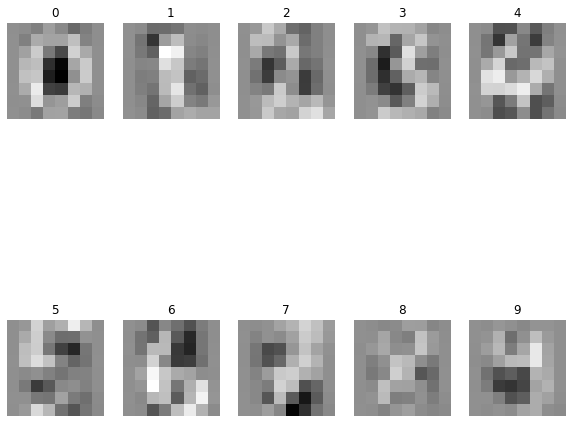

In [43]:
w_min, w_max = np.min(w), np.max(w)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(w[i],vmin = w_min, vmax = w_max)## ранее мы центрировали данные 
    plt.axis('off')
    plt.title(classes[i])

**Inline question 2**

Опишите, как выглядят ваши визуализированные веса SVM, и предложите краткое объяснение того, почему они выглядят так, а не иначе.

$\color{blue}{\textit Your Answer:}$ На изображениях выше представлены визуально  строки (reshape 8x8) матрицы весов SVM. Значения в этих строках получены минимизацией функций потерь классификатора SVM. Каждая строка представляет собой параметры одного линейного классификатора (при умножении матрицы весов на вектор данных Wx производится оценка изображения 10ю отдельными линейными классификаторами) обученному давать высокую оценку для одного определенного класса (больше на маржу чем для остальных). В результате для каждого класса вычислился некий шаблон. Почему они выглядят именно так. А потому что в тренировочных данных большинство изображений соответствующих классов выглядят примерно так же.

2.9 Сделайте выводы по второй части задания

- Во второй части задания был реализован линейный мультиклассовый SVM классификатор и его оптимизация посредством стохастического градиентного спуска.
- Градиент вычислен аналитически
- Реализовано вычисление градиента как прямым вычислением так и векторизованное. Время выполнения векторизованного вычисления градиента значительно меньше.
- Посредством кросвалидации были подобраны гиперпараметры (шаг обучения , коэффициент при регуляризации) которые обуславливают наибольшую долю (0.86) (уступает Knn) верных ответов на валидационной выборке.
- Точность сильно зависит от начальной инициализации весов

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [60]:
##########
%load_ext autoreload
%autoreload 2

x_train, x_test, y_train, y_test = train_test_split(MNIST_dataset.data, MNIST_dataset.target, test_size = 0.35, random_state = 22)

x_val = np.copy(x_test[0:len(x_test)//2]) # 17% от всего
y_val = np.copy(y_test[0:len(x_test)//2])
x_test = x_test[len(x_val)::]
y_test = y_test[len(y_val)::]

print(x_train.shape, x_val.shape, x_test.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1168, 64) (314, 64) (315, 64)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[0.00000000e+00 3.07363014e-01 5.29880137e+00 1.20034247e+01
 1.18493151e+01 5.79195205e+00 1.32277397e+00 1.23287671e-01
 5.99315068e-03 2.05393836e+00]


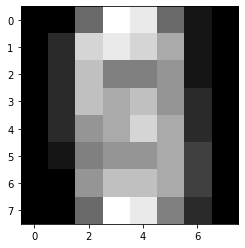

(1168, 65) (314, 65) (315, 65)


In [61]:
mean_image = np.mean(x_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8,8)).astype('uint8')) 
plt.show()


x_train -= mean_image
x_val -= mean_image
x_test -= mean_image



x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])


print(x_train.shape, x_val.shape, x_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




Вычислим градиент линейного классификатора с softmax.
Функция потерь имеет вид: $\frac{1}{N}\sum_{i=1}^{N}L_{i} + \lambda R(W), где R(W) = \sum_{k}\sum_{l}w_{k,l}^2$,

$L_{i} = -\log(\frac{e^{s_{y_{i}}}}{\sum_{j=1}^{C} e^{s_{j}}}) = -s_{y_{i}} + \log(\sum_{j=1}^{C} e^{s_{j}}), где \  s_{y_{i}}, s_{j}$ - оценки  классификатора для истинного и для всех классов соответственно : $s_{j} = <x_{i},w_{j}>$ - скалярное произведение вектора-строки данных на вектор-столбец весов 

$\frac{dL_{i}}{dw_{i,j=y_{i}}} = - x_{i, j = y_{i}} + \frac{x_{i, j = y_{i}} e^{s_{yi}}}{\sum_{j}^{C}e^{s_{j}}} $

$\frac{dL_{i}}{dw_{i,j≠y_{i}}} =  \frac{x_{i, j} e^{s_{j}}}{\sum_{j}^{C}e^{s_{j}}} $

In [62]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmax_loss_naive(W, x_train, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.301979
sanity check: 2.302585


**Inline Question 1**

Почему мы ожидаем, что наши потери будут близки к -log(0,1)? Кратко объясните.**

$\color{blue}{\textit Your Answer:}$ *вычисленная на 1 прогоне ошибка должна быть близка к -log(0.1) так как в начале случайная инициализация весов даст примерно одинаковые оценки для каждого из 10  классов  ( тогда  li = -log(0.1) для всех i => одинаковая вероятность принадл к каждому из классов) что по сути Loss = 1/10 Sum(Li) + 0 * R(W) = -log(0.1) (параметр регуляризации = 0 - задан по усл.)* 


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [63]:
loss, grad = softmax_loss_naive(W, x_train, y_train, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, x_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, x_train, y_train, 5e1)
f = lambda w: softmax_loss_naive(w, x_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.079773 analytic: 0.079773, relative error: 9.583391e-10
numerical: 0.102846 analytic: 0.102846, relative error: 6.973948e-10
numerical: 0.447376 analytic: 0.447376, relative error: 2.471562e-10
numerical: -0.180242 analytic: -0.180242, relative error: 3.346624e-10
numerical: -0.254142 analytic: -0.254142, relative error: 2.066707e-10
numerical: 0.042163 analytic: 0.042163, relative error: 3.688409e-09
numerical: 0.609495 analytic: 0.609495, relative error: 1.437105e-10
numerical: 0.000083 analytic: 0.000083, relative error: 5.730516e-07
numerical: -0.009750 analytic: -0.009750, relative error: 6.843654e-09
numerical: 0.000087 analytic: 0.000087, relative error: 8.671573e-07
numerical: 0.111442 analytic: 0.111442, relative error: 1.811261e-09
numerical: 0.033782 analytic: 0.033782, relative error: 1.780297e-11
numerical: -0.536406 analytic: -0.536406, relative error: 7.085256e-12
numerical: -0.503915 analytic: -0.503915, relative error: 1.930307e-10
numerical: -0.002661 ana

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [64]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, x_train, y_train, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, x_train, y_train, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.301979e+00 computed in 0.105953s
vectorized loss: 2.301979e+00 computed in 0.015624s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [65]:
from scripts.classifiers import Softmax
softmax = Softmax()
tic = time.time()
softmax.train(x_train, y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500,
              batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

y_test_pred = softmax.predict(x_test)
print('training accuracy: %f' % (np.mean(y_test == y_test_pred), ))

iteration 0 / 1500: loss 18.718390
iteration 100 / 1500: loss 8.326074
iteration 200 / 1500: loss 4.512566
iteration 300 / 1500: loss 3.113609
iteration 400 / 1500: loss 2.599579
iteration 500 / 1500: loss 2.411348
iteration 600 / 1500: loss 2.342087
iteration 700 / 1500: loss 2.316716
iteration 800 / 1500: loss 2.307434
iteration 900 / 1500: loss 2.304073
iteration 1000 / 1500: loss 2.302803
iteration 1100 / 1500: loss 2.302340
iteration 1200 / 1500: loss 2.302172
iteration 1300 / 1500: loss 2.302142
iteration 1400 / 1500: loss 2.302061
That took 0.506227s
training accuracy: 0.860317


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [66]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

num_blocks = 5 # тренировочный набор данных будет разделен на 5 часлей (4 обуч, 1 валидацонный)
# при изменении одного параметра другие фиксируются
grid_search = [ (lr,rg) for lr in learning_rates for rg in regularization_strengths ] # перебор всех вариантов параметров
# каждый набор параметров валидируется num_blocks раз

x_train_blocks = np.asarray(np.array_split(np.vstack((x_train,x_val)), num_blocks)) ## разделение всех тренировочных дангных на блоки
y_train_blocks = np.asarray(np.array_split(np.hstack((y_train,y_val)), num_blocks))

print("количество перекрестных проверок: {}".format(len(grid_search)*num_blocks))

количество перекрестных проверок: 20


In [67]:
best_softmax = None
grid_search_history = {}
best_val_accuracy = -1
best_lr = None
best_rg = None

for lr,rg in grid_search:
    
    mean_cross_val_accuracy = 0
    
    j=0
    while j < num_blocks:
        
        train_set_x = np.concatenate(x_train_blocks[np.delete(np.arange(0,num_blocks,1),j)])
        train_set_y = np.concatenate(y_train_blocks[np.delete(np.arange(0,num_blocks,1),j)])
        
        # выбор валидационных блоков
        x_val = x_train_blocks[j] 
        y_val = y_train_blocks[j]
        
        softmax = Softmax()
        softmax.train(train_set_x, train_set_y, learning_rate = lr, reg = rg, num_iters = 1500, verbose = False)
        y_val_pred = softmax.predict(x_val)
        mean_cross_val_accuracy += np.mean(y_val_pred == y_val)/num_blocks ## потом сложим дроби acc1/n_b + acc2/n_b, acc3/n_b-раз
        j+=1
        
    ## подсчитали среднюю  val_acc
    grid_search_history[(lr,rg)] = (mean_cross_val_accuracy)
    if best_val_accuracy < mean_cross_val_accuracy:
        best_val_accuracy = mean_cross_val_accuracy
        best_softmax = softmax
        best_lr = lr
        best_rg = rg

        
        

In [68]:
for key, value in sorted(grid_search_history.items(), key= lambda accuracy : np.asarray(accuracy)[1], reverse = True):
    val_accuracy = grid_search_history[key]
    print('lr %e reg %e  val_accuracy: %f' % (key[0], key[1], val_accuracy))
    
print('\nbest validation accuracy: %f' % best_val_accuracy)

lr 1.000000e-07 reg 5.000000e+04  val_accuracy: 0.858306
lr 1.000000e-07 reg 2.500000e+04  val_accuracy: 0.856284
lr 5.000000e-05 reg 5.000000e+04  val_accuracy: 0.100526
lr 5.000000e-05 reg 2.500000e+04  val_accuracy: 0.094422

best validation accuracy: 0.858306


In [69]:
w = best_softmax.W[:-1,:] # -1 так как мы добавляли вектор смещения
w = w.T
w = w.reshape(10,8,8)
print(np.shape(w))

(10, 8, 8)


**Inline Question 2** - *True or False*

Предположим, что общие потери при обучении определяются как сумма потерь для каждой точки данных по всем обучающим примерам. Можно добавить новую точку данных в обучающий набор, который оставит потери SVM без изменений, но это не относится к потерям классификатора Softmax.
$\color{blue}{\textit Your Answer: Да}$


$\color{blue}{\textit Your Explanation: }$ Если в качестве новой точки данных мы добавим один или несколько шаблонов классов представленых строками в матрице весов. Значение функции потерь на этих данных = 0, так как оценки для них отличаются мимнимум на маржу. Или если добвать любую другую точку данных оценка для которого будет также на маржу больше чем для других классов.


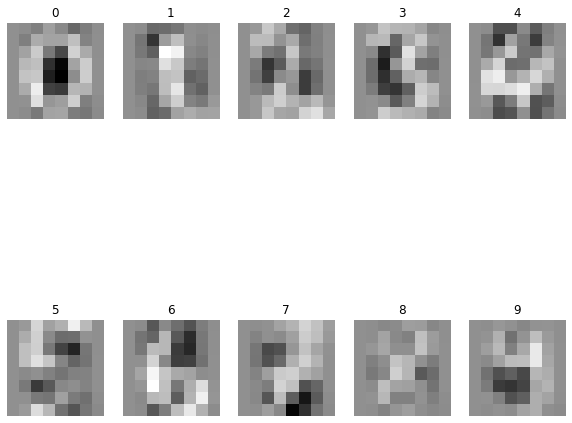

In [70]:
w_min, w_max = np.min(w), np.max(w)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(w[i],vmin = w_min, vmax = w_max)## ранее мы центрировали данные 
    plt.axis('off')
    plt.title(classes[i])

3.10 Сделайте выводы по третьей части задания

- В третьей части задания был реализован линейный классификатор с функцией потерь softmax loss.
- Реализовано аналитическое вычисление градиента (в цикле и векторизованный метод). Использовался стохастический градиентный спуск.
- Произведена кроссвалидация классификатора softmax по гиперпараметрам: learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4], c кол-вом блоков = 5. В результате кроссвалидации наибольшая доля верных ответов составила 0.86 (уступает Knn) при значениях параметров lr 1.000000e-07 reg 5.000000e+04 